# Working Notebook

__Phase 3 Project - Chicago Traffic Crash Classification__

### Business Understanding

### Data Understanding and Preparation

Load dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV


In [2]:
import warnings
warnings.filterwarnings('ignore')

Import data files

In [3]:
crashes = pd.read_csv('C:/Users/angie/Desktop/group_project/Chicago-Crashes/data/Traffic_Crashes_-_Crashes.csv', low_memory=False)
people = pd.read_csv('C:/Users/angie/Desktop/group_project/Chicago-Crashes/data/Traffic_Crashes_-_People.csv', low_memory = False)
#vehicles = pd.read_csv('Chicago-Crashes/data/Traffic_Crashes_-_Vehicles.csv', low_memory=False)

Remove columns with 80% or more of null values.

In [4]:
df_list=[crashes, people]
for df in df_list:
    min_count =  int((20/100)*df.shape[0] + 1)
    df = df.dropna(axis=1, thresh=min_count, inplace=True)

In [5]:
crashes.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


Drop columns that will not be used

In [6]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541142 entries, 0 to 541141
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                541142 non-null  object 
 1   RD_NO                          536550 non-null  object 
 2   CRASH_DATE                     541142 non-null  object 
 3   POSTED_SPEED_LIMIT             541142 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         541142 non-null  object 
 5   DEVICE_CONDITION               541142 non-null  object 
 6   WEATHER_CONDITION              541142 non-null  object 
 7   LIGHTING_CONDITION             541142 non-null  object 
 8   FIRST_CRASH_TYPE               541142 non-null  object 
 9   TRAFFICWAY_TYPE                541142 non-null  object 
 10  LANE_CNT                       198968 non-null  float64
 11  ALIGNMENT                      541142 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [7]:
crashes_mod = crashes.drop(['CRASH_DATE','RD_NO','REPORT_TYPE', 'DATE_POLICE_NOTIFIED', 'STREET_NO', 
              'STREET_DIRECTION', 'STREET_NAME', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
             'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 
             'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN'], axis =1)

In [8]:
people_mod = people.drop(['CITY', 'ZIPCODE','RD_NO'], axis =1)

In [9]:
people_mod.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'STATE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT'],
      dtype='object')

In [10]:
#vehicles_mod = vehicles.drop(['RD_NO', 'CRASH_DATE', 'UNIT_NO', 'AREA_01_I'], axis =1)

In [11]:
people_mod.shape

(1195747, 19)

In [12]:
#vehicles_mod.shape

In [13]:
crashes_mod.shape

(541142, 26)

## First Simple Model

In [13]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541142 entries, 0 to 541141
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                541142 non-null  object 
 1   RD_NO                          536550 non-null  object 
 2   CRASH_DATE                     541142 non-null  object 
 3   POSTED_SPEED_LIMIT             541142 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         541142 non-null  object 
 5   DEVICE_CONDITION               541142 non-null  object 
 6   WEATHER_CONDITION              541142 non-null  object 
 7   LIGHTING_CONDITION             541142 non-null  object 
 8   FIRST_CRASH_TYPE               541142 non-null  object 
 9   TRAFFICWAY_TYPE                541142 non-null  object 
 10  LANE_CNT                       198968 non-null  float64
 11  ALIGNMENT                      541142 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [14]:
crashes.MOST_SEVERE_INJURY.value_counts()

NO INDICATION OF INJURY     468994
NONINCAPACITATING INJURY     39675
REPORTED, NOT EVIDENT        21763
INCAPACITATING INJURY         9040
FATAL                          547
Name: MOST_SEVERE_INJURY, dtype: int64

Set up target variable:
 - 0: NO INDICATION OF INJURY, NONINCAPACITATING INJURY, REPORTED, NOT EVIDENT
 - 1: INCAPACITATING INJURY, FATAL
 

In [11]:
crashes['TARGET']= crashes['MOST_SEVERE_INJURY'].map({'NO INDICATION OF INJURY': 0,
                                                      'NONINCAPACITATING INJURY': 0,
                                                      'REPORTED, NOT EVIDENT': 0,
                                                      'INCAPACITATING INJURY': 1,
                                                      'FATAL': 1})

In [15]:
crashes.TARGET.fillna(0, inplace=True)

In [16]:
crashes.TARGET.value_counts()

0.0    531555
1.0      9587
Name: TARGET, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X = crashes.drop(['MOST_SEVERE_INJURY','INJURIES_TOTAL', 'INJURIES_FATAL','INJURIES_INCAPACITATING',
                      'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
                      'INJURIES_NO_INDICATION', 'TARGET', 'CRASH_RECORD_ID', 'CRASH_DATE', 'LATITUDE', 
                      'LONGITUDE','LOCATION'], axis=1)
y = crashes['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [83]:
X.columns

Index(['PERSON_TYPE', 'SEAT_NO', 'STATE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'BAC_RESULT', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'INTERSECTION_RELATED_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'CRASH_YEAR'],
      dtype='object')

In [18]:
X_train_nums = X_train.select_dtypes(include=['float64', 'int64'])
X_train_cat = X_train.select_dtypes('object')

In [19]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first',
                         sparse=False))
])

trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

In [20]:
model_pipe = Pipeline(steps=[
    ('trans', trans),
    ('dc', DummyClassifier(strategy='most_frequent'))
])

In [22]:
#model_pipe.fit(X_train, y_train)

In [23]:
#model_pipe.score(X_train, y_train)

Add cross val score

### Merging Dataframes

From the people data, the target will be the injury classification so that the model will predict the severity of injuries.

In [24]:
people_mod.INJURY_CLASSIFICATION.value_counts()

NO INDICATION OF INJURY     1096283
NONINCAPACITATING INJURY      55296
REPORTED, NOT EVIDENT         32092
INCAPACITATING INJURY         10827
FATAL                           656
Name: INJURY_CLASSIFICATION, dtype: int64

To avoid too many repeated rows from crashes_dropped_df, we'll use the `CRASH_RECORD_ID` to only merge in rows from people_dropped_df where `DRIVER_TYPE == DRIVER`, then use the `VEHICLE_ID` to only merge in that driver's vehicle from vehicles_dropped_df.

This will allow us to still retain over 75% of the rows from people.

In [25]:
people_mod.PERSON_TYPE.value_counts(normalize=True)

DRIVER                 0.776163
PASSENGER              0.204485
PEDESTRIAN             0.011393
BICYCLE                0.006911
NON-MOTOR VEHICLE      0.000866
NON-CONTACT VEHICLE    0.000181
Name: PERSON_TYPE, dtype: float64

In [12]:
people_crashes_df = people_mod.merge(crashes_mod, on='CRASH_RECORD_ID', how='left')

In [27]:
people_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195747 entries, 0 to 1195746
Data columns (total 44 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   PERSON_ID                1195747 non-null  object 
 1   PERSON_TYPE              1195747 non-null  object 
 2   CRASH_RECORD_ID          1195747 non-null  object 
 3   VEHICLE_ID               1172146 non-null  float64
 4   CRASH_DATE               1195747 non-null  object 
 5   SEAT_NO                  244512 non-null   float64
 6   STATE                    890189 non-null   object 
 7   SEX                      1177665 non-null  object 
 8   AGE                      852450 non-null   float64
 9   DRIVERS_LICENSE_STATE    705542 non-null   object 
 10  DRIVERS_LICENSE_CLASS    608027 non-null   object 
 11  SAFETY_EQUIPMENT         1192258 non-null  object 
 12  AIRBAG_DEPLOYED          1173141 non-null  object 
 13  EJECTION                 1181206 non-null 

In [28]:
people_crashes_df.INJURY_CLASSIFICATION.value_counts()

NO INDICATION OF INJURY     1096283
NONINCAPACITATING INJURY      55296
REPORTED, NOT EVIDENT         32092
INCAPACITATING INJURY         10827
FATAL                           656
Name: INJURY_CLASSIFICATION, dtype: int64

In [13]:
people_crashes_df['TARGET'] = people_crashes_df['INJURY_CLASSIFICATION'].map({np.nan: 0,
                                                      'NO INDICATION OF INJURY': 0,
                                                      'NONINCAPACITATING INJURY': 1,
                                                      'REPORTED, NOT EVIDENT': 1,
                                                      'INCAPACITATING INJURY': 2,
                                                      'FATAL': 3})

In [14]:
people_crashes_df.TARGET.isna().sum()

0

In [15]:
people_crashes_df['CRASH_YEAR']=pd.to_datetime(people_crashes_df['CRASH_DATE']).dt.year

In [32]:
people_crashes_df['CRASH_YEAR'].value_counts()

2018    265694
2019    263972
2020    202084
2017    185328
2021    161704
2016     96020
2015     20931
2014        11
2013         3
Name: CRASH_YEAR, dtype: int64

In [33]:
people_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195747 entries, 0 to 1195746
Data columns (total 46 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   PERSON_ID                1195747 non-null  object 
 1   PERSON_TYPE              1195747 non-null  object 
 2   CRASH_RECORD_ID          1195747 non-null  object 
 3   VEHICLE_ID               1172146 non-null  float64
 4   CRASH_DATE               1195747 non-null  object 
 5   SEAT_NO                  244512 non-null   float64
 6   STATE                    890189 non-null   object 
 7   SEX                      1177665 non-null  object 
 8   AGE                      852450 non-null   float64
 9   DRIVERS_LICENSE_STATE    705542 non-null   object 
 10  DRIVERS_LICENSE_CLASS    608027 non-null   object 
 11  SAFETY_EQUIPMENT         1192258 non-null  object 
 12  AIRBAG_DEPLOYED          1173141 non-null  object 
 13  EJECTION                 1181206 non-null 

In [16]:
# Drop nulls from BEAT_OF_OCCURRENCE
people_crashes_df.dropna(subset = ['BEAT_OF_OCCURRENCE'], inplace=True)

# Drop ages < 0 and ages = 0 for DRIVER
people_crashes_df.loc[people_crashes_df.AGE < 0, 'AGE'] = np.nan
people_crashes_df.loc[(people_crashes_df.AGE == 0) & (people_crashes_df.PERSON_TYPE == 'DRIVER'), 'AGE'] = np.nan
people_crashes_df.dropna(subset = ['AGE'], inplace=True)

# Drop POSTED_SPEED_LIMIT = 0 or not divisible by 5
people_crashes_df.loc[people_crashes_df.POSTED_SPEED_LIMIT == 0, 'POSTED_SPEED_LIMIT'] = np.nan
people_crashes_df.loc[(people_crashes_df.POSTED_SPEED_LIMIT % 5) != 0, 'POSTED_SPEED_LIMIT'] = np.nan
people_crashes_df.dropna(subset = ['POSTED_SPEED_LIMIT'], inplace=True)

In [17]:
X = people_crashes_df.drop(['PERSON_ID', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'CRASH_DATE', 'LANE_CNT', 'DRIVERS_LICENSE_STATE', 
                            'LATITUDE', 'LONGITUDE', 'LOCATION', 'INJURY_CLASSIFICATION', 'TARGET', 'CRASH_TYPE'], axis=1)
y = people_crashes_df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [18]:
from sklearn.preprocessing import FunctionTransformer

def seat_no_transformer(df):
    df['SEAT_NO'][df.PERSON_TYPE == 'DRIVER'] = 1
    df['SEAT_NO'].fillna(0, inplace=True)
    return df

In [19]:
def dl_class_transformer(df):
    dl_classes = ['A', 'B', 'C', 'D', np.nan]
    df['DRIVERS_LICENSE_CLASS'].loc[df['DRIVERS_LICENSE_CLASS'].isin(dl_classes) == False] = 'OTHER'
    return df

In [20]:
# def age_transformer(df):
#     df['AGE'][df.AGE < 0] = np.nan
#     df.loc[(df.AGE==0)&(df.PERSON_TYPE == 'DRIVER')]['AGE'] = np.nan
#     return df

In [21]:
# def speed_transformer(df):
#     df['POSTED_SPEED_LIMIT'][df.POSTED_SPEED_LIMIT == 0] = np.nan
#     df['POSTED_SPEED_LIMIT'][(df.POSTED_SPEED_LIMIT %5) != 0] = np.nan
#     return df

In [22]:
def beat_transformer(df):
    df['BEAT_OF_OCCURRENCE'] = df['BEAT_OF_OCCURRENCE'].astype('string')
    df['BEAT_OF_OCCURRENCE'] = df['BEAT_OF_OCCURRENCE'].apply(lambda x: x[:-4])
    df.BEAT_OF_OCCURRENCE.dropna()
    return df

In [23]:
def to_float_transformer(df):
    '''
    Ensure all columns are float, not int.
    '''
    for col in [df.select_dtypes('int64').columns]:
        df[col] = df[col].astype('float64')
    return df

In [24]:
def fill_categories(df):
    '''
    Fill null values with given value for 
    unknown values in that column.
    Drop all remaining nulls.
    '''
    df.fillna({'STATE':'XX', 
               # 'DRIVERS_LICENSE_STATE':'XX', # This col now dropped before train-test-split
               'DRIVERS_LICENSE_CLASS': 'D', # Most common; D = 'normal' drivers license for cars
               'EJECTION': 'UNKNOWN',
               'DRIVER_ACTION': 'UNKNOWN',
               'DRIVER_VISION': 'UNKNOWN',
               'PHYSICAL_CONDITION': 'UNKNOWN',
               'SAFETY_EQUIPMENT': 'USAGE_UNKNOWN',
               'AIRBAG_DEPLOYED': 'DEPLOYMENT_UNKNOWN',
               'SEX': 'UNKNOWN',
               'INTERSECTION_RELATED_I': 'N',
               'HIT_AND_RUN_I': 'N',
               'BAC_RESULT': 'TEST NOT OFFERED'
              }, inplace=True)
    return df

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe_cols = list(X_train.select_dtypes('object').columns)
ohe_cols.append('BEAT_OF_OCCURRENCE')

# OneHotEncode the columns as part of cleaning
# to avoid needing to separate numerical and categorical
# columns later
ohe_col_trans = ColumnTransformer(transformers=
                                     [('ohe', OneHotEncoder(drop='first', sparse=False), 
                                       ohe_cols)],
                                 remainder='passthrough')

# Apply all our cleaning functions, then finish with ohe
cleaning_pipeline = Pipeline(steps=[
    ('seat_no', FunctionTransformer(seat_no_transformer)),
#     ('age', FunctionTransformer(age_transformer)),
    ('beat', FunctionTransformer(beat_transformer)),
#     ('speed', FunctionTransformer(speed_limit_transformer)),
    ('license', FunctionTransformer(dl_class_transformer)),
    ('fill_cat', FunctionTransformer(fill_categories)),
    ('float', FunctionTransformer(to_float_transformer)),
    ('col_trains', ohe_col_trans)
])

In [26]:
X_train_cleaned = cleaning_pipeline.fit_transform(X_train)
#X_test_transformed = cleaning_pipeline.transform(X_test)

In [45]:
# for i in range(len(X_train_transformed.columns)):
#    print(X_train_transformed[X_train_transformed.columns[i]].value_counts())
#    print(X_train_transformed[X_train_transformed.columns[i]].isna().sum())
#    print('--------------------')

In [46]:
#X_train_nums = X_train_transformed.select_dtypes(include=['float64', 'int64'])
#X_train_cat = X_train_transformed.select_dtypes('object')

In [47]:
# model_pipe = Pipeline(steps=[
#     ('ss', StandardScaler()),
#     ('lr', LogisticRegression(random_state=42))
# ])

In [48]:
# model_pipe.fit(X_train_cleaned, y_train)

In [49]:
# model_pipe.score(X_train_cleaned, y_train)

In [50]:
# from sklearn.model_selection import cross_validate

# def print_cv_scores(pipe):
    
#     # we pass in pipe to cross validate along with a feature list.
#     results = cross_validate(pipe, X_train_cleaned, 
#                                    y_train, 
#                                    return_train_score=True)
    
#     print(results['train_score'])
#     print(results['train_score'].mean())
#     print('##############')
#     print(results['test_score'])
#     print(results['test_score'].mean())
    
# print_cv_scores(model_pipe)

### 

In [27]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [52]:
# model_pipe = Pipeline(steps=[
#     ('ss', StandardScaler()),
#     ('dtc', DecisionTreeClassifier(random_state=42, max_depth= 6))
# ])
  
# model_pipe.fit(X_train_cleaned, y_train) 

In [53]:
# from sklearn.model_selection import cross_validate

# def print_cv_scores(pipe):
    
#     # we pass in pipe to cross validate along with a feature list.
#     results = cross_validate(pipe, X_train_cleaned, 
#                                    y_train, 
#                                    return_train_score=True)
    
#     print(results['train_score'])
#     print(results['train_score'].mean())
#     print('##############')
#     print(results['test_score'])
#     print(results['test_score'].mean())
    
# print_cv_scores(model_pipe)

In [54]:
# model_pipe.steps[1][1].feature_importances_

In [55]:
# def print_dtc_features(cleaning_pipeline, model_pipeline, thresh=0.05, return_list=False):
#     ohe_feature_names = cleaning_pipeline.steps[-1][1].get_feature_names()
#     dtc_features = model_pipeline.steps[1][1].feature_importances_
#     result = []
    
#     for i in range(len(dtc_features)):
#         if abs(dtc_features[i] >= thresh):
#             print(ohe_feature_names[i], ': ', dtc_features[i])
#             #result.append(ohe_feature_names[j], lr_coefs[i][j])
#     print('='*30, '\n')
        
#     if return_list:
#         return result
#     else:
#         return

In [56]:
# print_dtc_features(cleaning_pipeline, model_pipe, thresh=0.05, return_list=False)

In [57]:
# ohe_feature_names = cleaning_pipeline.steps[-1][1].get_feature_names()

# plt.figure(figsize=(40,40), dpi=500)
# tree.plot_tree(model_pipe.steps[1][1], 
#                feature_names=ohe_feature_names,
#                class_names=np.unique(y).astype('str'),
#                filled=True, rounded=True, max_depth = 2)
# plt.show()

New Model with all Steps

In [58]:
# crashes = pd.read_csv('C:/Users/angie/Desktop/group_project/Chicago-Crashes/data/Traffic_Crashes_-_Crashes.csv', low_memory=False)
# people = pd.read_csv('C:/Users/angie/Desktop/group_project/Chicago-Crashes/data/Traffic_Crashes_-_People.csv', low_memory = False)
# #vehicles = pd.read_csv('Chicago-Crashes/data/Traffic_Crashes_-_Vehicles.csv', low_memory=False)

# people_mod = people.drop(['CITY', 'ZIPCODE','RD_NO'], axis =1)
# crashes_mod = crashes.drop(['CRASH_DATE','RD_NO','REPORT_TYPE', 'DATE_POLICE_NOTIFIED', 'STREET_NO', 
#               'STREET_DIRECTION', 'STREET_NAME', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
#              'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 
#              'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN'], axis =1)

# people_crashes_df = people_mod.merge(crashes_mod, on='CRASH_RECORD_ID', how='left')

# people_crashes_df['TARGET'] = people_crashes_df['INJURY_CLASSIFICATION'].map({np.nan: 0,
#                                                       'NO INDICATION OF INJURY': 0,
#                                                       'NONINCAPACITATING INJURY': 1,
#                                                       'REPORTED, NOT EVIDENT': 1,
#                                                       'INCAPACITATING INJURY': 2,
#                                                       'FATAL': 3})

# people_crashes_df['CRASH_YEAR']=pd.to_datetime(people_crashes_df['CRASH_DATE']).dt.year

# # Drop nulls from BEAT_OF_OCCURRENCE
# people_crashes_df.dropna(subset = ['BEAT_OF_OCCURRENCE'], inplace=True)

# # Drop ages < 0 and ages = 0 for DRIVER
# people_crashes_df.loc[people_crashes_df.AGE < 0, 'AGE'] = np.nan
# people_crashes_df.loc[(people_crashes_df.AGE == 0) & (people_crashes_df.PERSON_TYPE == 'DRIVER'), 'AGE'] = np.nan
# people_crashes_df.dropna(subset = ['AGE'], inplace=True)

# # Drop POSTED_SPEED_LIMIT = 0 or not divisible by 5
# people_crashes_df.loc[people_crashes_df.POSTED_SPEED_LIMIT == 0, 'POSTED_SPEED_LIMIT'] = np.nan
# people_crashes_df.loc[(people_crashes_df.POSTED_SPEED_LIMIT % 5) != 0, 'POSTED_SPEED_LIMIT'] = np.nan
# people_crashes_df.dropna(subset = ['POSTED_SPEED_LIMIT'], inplace=True)

# X = people_crashes_df.drop(['PERSON_ID', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'CRASH_DATE', 'LANE_CNT', 'DRIVERS_LICENSE_STATE', 
#                             'LATITUDE', 'LONGITUDE', 'LOCATION', 'INJURY_CLASSIFICATION', 'TARGET', 'CRASH_TYPE'], axis=1)
# y = people_crashes_df['TARGET']

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# from sklearn.preprocessing import FunctionTransformer

# def seat_no_transformer(df):
#     df['SEAT_NO'][df.PERSON_TYPE == 'DRIVER'] = 1
#     df['SEAT_NO'].fillna(0, inplace=True)
#     return df

# def dl_class_transformer(df):
#     dl_classes = ['A', 'B', 'C', 'D', np.nan]
#     df['DRIVERS_LICENSE_CLASS'].loc[df['DRIVERS_LICENSE_CLASS'].isin(dl_classes) == False] = 'OTHER'
#     return df

# def beat_transformer(df):
#     df['BEAT_OF_OCCURRENCE'] = df['BEAT_OF_OCCURRENCE'].astype('string')
#     df['BEAT_OF_OCCURRENCE'] = df['BEAT_OF_OCCURRENCE'].apply(lambda x: x[:-4])
#     df.BEAT_OF_OCCURRENCE.dropna()
#     return df

# def to_float_transformer(df):
#     '''
#     Ensure all columns are float, not int.
#     '''
#     for col in [df.select_dtypes('int64').columns]:
#         df[col] = df[col].astype('float64')
#     return df

# def fill_categories(df):
#     '''
#     Fill null values with given value for 
#     unknown values in that column.
#     Drop all remaining nulls.
#     '''
#     df.fillna({'STATE':'XX', 
#                # 'DRIVERS_LICENSE_STATE':'XX', # This col now dropped before train-test-split
#                'DRIVERS_LICENSE_CLASS': 'D', # Most common; D = 'normal' drivers license for cars
#                'EJECTION': 'UNKNOWN',
#                'DRIVER_ACTION': 'UNKNOWN',
#                'DRIVER_VISION': 'UNKNOWN',
#                'PHYSICAL_CONDITION': 'UNKNOWN',
#                'SAFETY_EQUIPMENT': 'USAGE_UNKNOWN',
#                'AIRBAG_DEPLOYED': 'DEPLOYMENT_UNKNOWN',
#                'SEX': 'UNKNOWN',
#                'INTERSECTION_RELATED_I': 'N',
#                'HIT_AND_RUN_I': 'N',
#                'BAC_RESULT': 'TEST NOT OFFERED'
#               }, inplace=True)
#     return df

# ohe_cols = list(X_train.select_dtypes('object').columns)
# ohe_cols.append('BEAT_OF_OCCURRENCE')

# # OneHotEncode the columns as part of cleaning
# # to avoid needing to separate numerical and categorical
# # columns later
# ohe_col_trans = ColumnTransformer(transformers=
#                                      [('ohe', OneHotEncoder(drop='first', sparse=False), 
#                                        ohe_cols)],
#                                  remainder='passthrough')

# # Apply all our cleaning functions, then finish with ohe
# cleaning_pipeline = Pipeline(steps=[
#     ('seat_no', FunctionTransformer(seat_no_transformer)),
# #     ('age', FunctionTransformer(age_transformer)),
#     ('beat', FunctionTransformer(beat_transformer)),
# #     ('speed', FunctionTransformer(speed_limit_transformer)),
#     ('license', FunctionTransformer(dl_class_transformer)),
#     ('fill_cat', FunctionTransformer(fill_categories)),
#     ('float', FunctionTransformer(to_float_transformer)),
#     ('col_trains', ohe_col_trans)
# ])



In [ ]:
START HERE

In [28]:
X_train_cleaned = cleaning_pipeline.fit_transform(X_train)

In [29]:
model_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('dtc', DecisionTreeClassifier(random_state=42, max_depth= 6, class_weight = 'balanced'))
])

In [30]:
model_pipe.fit(X_train_cleaned, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('dtc',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                                        random_state=42))])

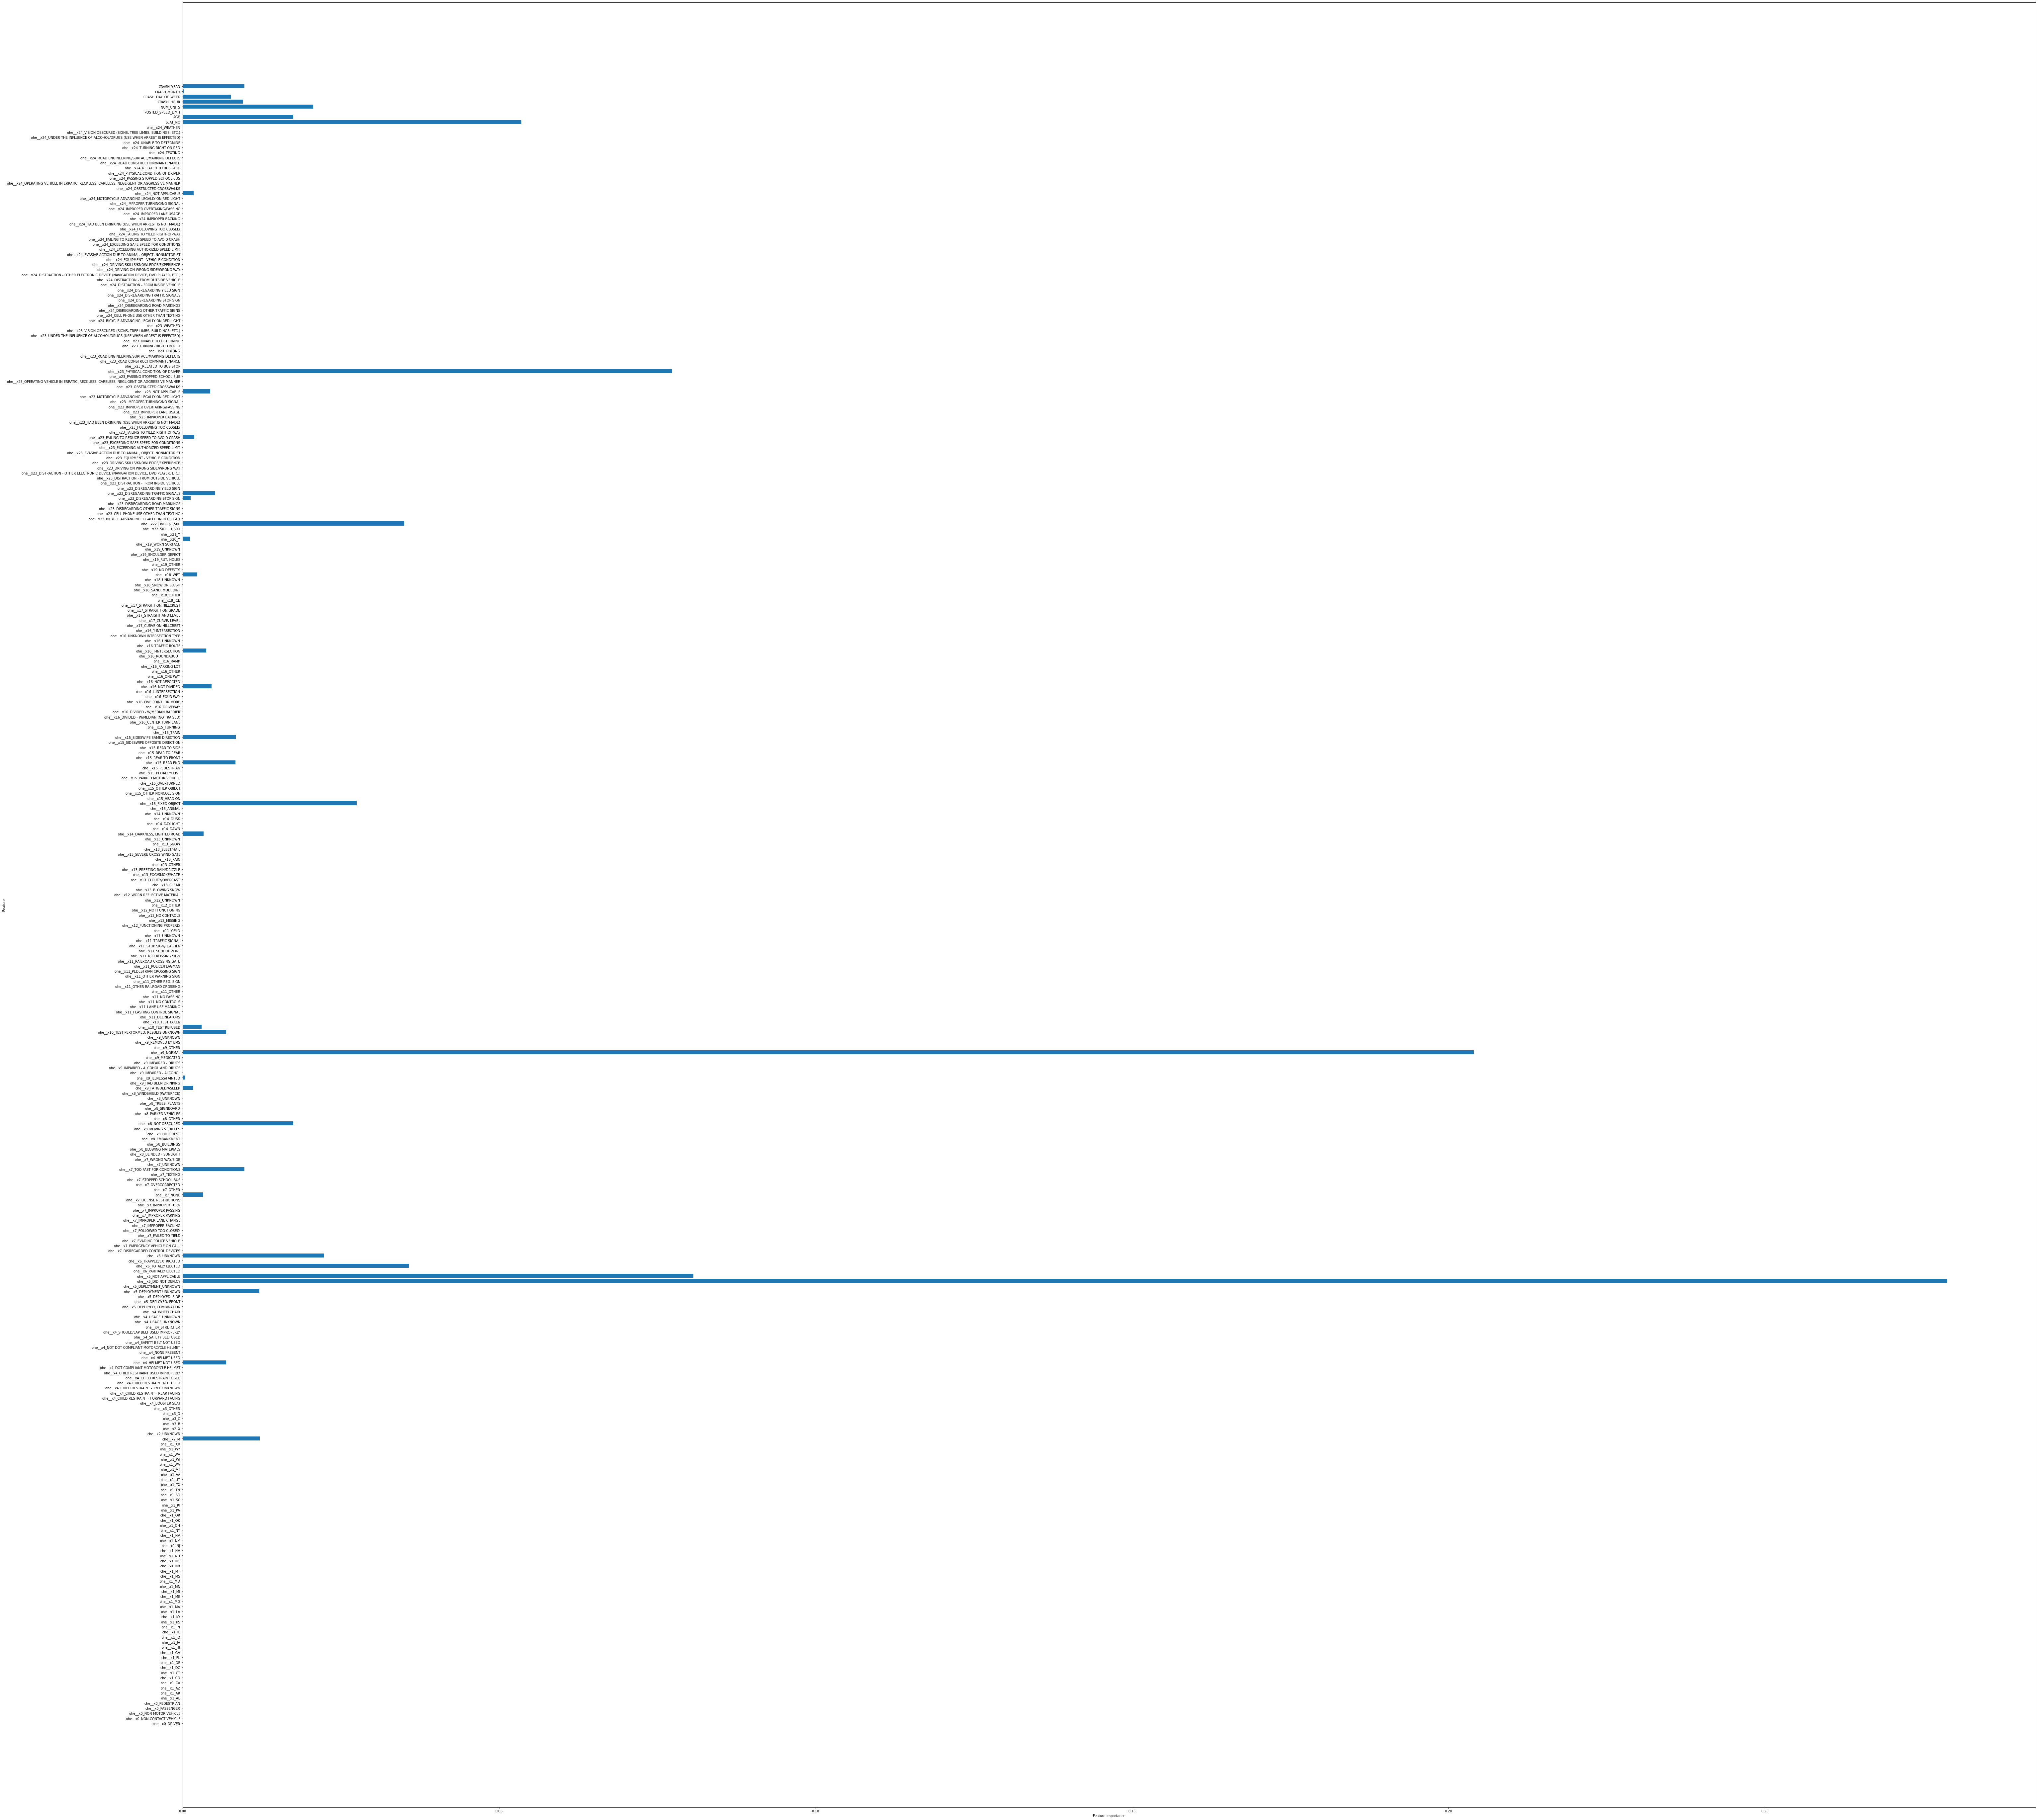

In [85]:
def plot_feature_importances(model):
    n_features = X_train_cleaned.shape[1]
    plt.figure(figsize=(100,100))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cleaning_pipeline.steps[-1][1].get_feature_names()) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
plot_feature_importances(model_pipe.steps[1][1])

In [92]:
model_pipe.steps[1][1].feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [80]:
feature_name = cleaning_pipeline.steps[-1][1].get_feature_names()
importance = model_pipe.steps[1][1].feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v > 0.0001:
        print('Feature: %s, Score: %.5f' % (feature_name[i],v))
# plot feature importance


Feature: ohe__x2_M, Score: 0.01220
Feature: ohe__x4_HELMET NOT USED, Score: 0.00688
Feature: ohe__x5_DEPLOYMENT UNKNOWN, Score: 0.01211
Feature: ohe__x5_DID NOT DEPLOY, Score: 0.27887
Feature: ohe__x5_NOT APPLICABLE, Score: 0.08073
Feature: ohe__x6_TOTALLY EJECTED, Score: 0.03575
Feature: ohe__x6_UNKNOWN, Score: 0.02233
Feature: ohe__x7_NONE, Score: 0.00324
Feature: ohe__x7_TOO FAST FOR CONDITIONS, Score: 0.00975
Feature: ohe__x8_NOT OBSCURED, Score: 0.01746
Feature: ohe__x9_FATIGUED/ASLEEP, Score: 0.00162
Feature: ohe__x9_ILLNESS/FAINTED, Score: 0.00041
Feature: ohe__x9_NORMAL, Score: 0.20403
Feature: ohe__x10_TEST PERFORMED, RESULTS UNKNOWN, Score: 0.00687
Feature: ohe__x10_TEST REFUSED, Score: 0.00301
Feature: ohe__x11_TRAFFIC SIGNAL, Score: 0.00012
Feature: ohe__x14_DARKNESS, LIGHTED ROAD, Score: 0.00331
Feature: ohe__x15_FIXED OBJECT, Score: 0.02747
Feature: ohe__x15_REAR END, Score: 0.00836
Feature: ohe__x15_SIDESWIPE SAME DIRECTION, Score: 0.00841
Feature: ohe__x16_NOT DIVIDED, 

In [31]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model_pipe.steps[1][1], X_train_cleaned, y_train)

[[0.74267146 0.18156107 0.02620512 0.04956235]
 [0.32385684 0.35424698 0.20321016 0.11868603]
 [0.17874916 0.26859449 0.30248823 0.25016812]
 [0.02369668 0.11137441 0.22274882 0.64218009]]


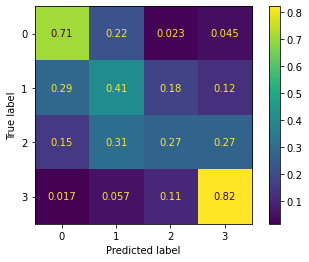

In [34]:
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_train, y_pred, normalize = 'true')
print(cm)
plot_confusion_matrix(model_pipe, X_train_cleaned, y_train, normalize = 'true')

In [62]:
# from sklearn.model_selection import cross_validate

# def print_cv_scores(pipe):
    
#     # we pass in pipe to cross validate along with a feature list.
#     results = cross_validate(pipe, X_train_cleaned, 
#                                    y_train, 
#                                    return_train_score=True)
    
#     print(results['train_score'])
#     print(results['train_score'].mean())
#     print('##############')
#     print(results['test_score'])
#     print(results['test_score'].mean())
    
# print_cv_scores(model_pipe)

In [63]:
# model_pipe.steps[1][1].feature_importances_

In [64]:
# def print_dtc_features(cleaning_pipeline, model_pipeline, thresh=0.05, return_list=False):
#     ohe_feature_names = cleaning_pipeline.steps[-1][1].get_feature_names()
#     dtc_features = model_pipeline.steps[1][1].feature_importances_
#     result = []
    
#     for i in range(len(dtc_features)):
#         if abs(dtc_features[i] >= thresh):
#             print(ohe_feature_names[i], ': ', dtc_features[i])
#             #result.append(ohe_feature_names[j], lr_coefs[i][j])
#     print('='*30, '\n')
        
#     if return_list:
#         return result
#     else:
#         return

In [65]:
# ohe_feature_names = cleaning_pipeline.steps[-1][1].get_feature_names()

# plt.figure(figsize=(40,40), dpi=500)
# tree.plot_tree(model_pipe.steps[1][1], 
#                feature_names=ohe_feature_names,
#                class_names=np.unique(y).astype('str'),
#                filled=True, rounded=True, max_depth = 2)
# plt.show()

In [93]:
rom sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

model_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

SyntaxError: invalid syntax (<ipython-input-93-b9fb8a5015f0>, line 1)